In [26]:
import sys
sys.version

'2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [27]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange, tqdm
import pickle

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## Load data

In [28]:
from hackathon.utils.utils import *
from hackathon.utils.draw_utils import *
import pandas as pd

In [29]:
test_data = parse_data("../small_data/test_data.csv")
train_data = parse_data("../small_data/train_data.csv")


In [30]:
train_data.shape, test_data.shape

((8723, 56), (4344, 56))

In [31]:
train_data[:3]

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,dmop_count_24h_AMMM,dmop_count_24h_AOOO,dmop_count_24h_APSF,dmop_count_24h_ASSS,dmop_count_24h_ASXX,dmop_count_24h_ATMB,dmop_count_24h_ATTT,dmop_count_24h_AVVV,dmop_count_24h_AXXX,dmop_count_24h_sum
ut_ms,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.159530,0.001500,0.174177,0.943549,0.000722,0.001632,0.000560,0.001843,0.247678,0.005081,...,34.0,23.0,35.0,6.0,0.0,3.0,21.0,0.0,0.0,306.0
2014-01-01 01:00:00,0.121151,0.001521,0.175512,0.604849,0.000744,0.001924,0.000563,0.001886,0.185319,0.005126,...,34.0,23.0,35.0,6.0,0.0,3.0,21.0,0.0,0.0,306.0
2014-01-01 02:00:00,0.113486,0.001529,0.175482,1.041955,0.000753,0.002059,0.000566,0.001918,0.176361,0.005259,...,34.0,23.0,35.0,6.0,0.0,3.0,21.0,0.0,0.0,306.0


In [32]:
for i, c in enumerate(train_data.columns):
    print(i, c)

0 NPWD2372
1 NPWD2401
2 NPWD2402
3 NPWD2451
4 NPWD2471
5 NPWD2472
6 NPWD2481
7 NPWD2482
8 NPWD2491
9 NPWD2501
10 NPWD2531
11 NPWD2532
12 NPWD2551
13 NPWD2552
14 NPWD2561
15 NPWD2562
16 NPWD2691
17 NPWD2692
18 NPWD2721
19 NPWD2722
20 NPWD2742
21 NPWD2771
22 NPWD2791
23 NPWD2792
24 NPWD2801
25 NPWD2802
26 NPWD2821
27 NPWD2851
28 NPWD2852
29 NPWD2871
30 NPWD2872
31 NPWD2881
32 NPWD2882
33 sunmars_km
34 earthmars_km
35 sunmarsearthangle_deg
36 solarconstantmars
37 eclipseduration_min
38 occultationduration_min
39 sa
40 sx
41 sy
42 sz
43 dmop_count_24h_AAAA
44 dmop_count_24h_AACF
45 dmop_count_24h_AHHH
46 dmop_count_24h_AMMM
47 dmop_count_24h_AOOO
48 dmop_count_24h_APSF
49 dmop_count_24h_ASSS
50 dmop_count_24h_ASXX
51 dmop_count_24h_ATMB
52 dmop_count_24h_ATTT
53 dmop_count_24h_AVVV
54 dmop_count_24h_AXXX
55 dmop_count_24h_sum


## Split dataset into train/valid datasets

Here one should take special care about how to split train dataset. It is better to consider multifold cross validation scheme.

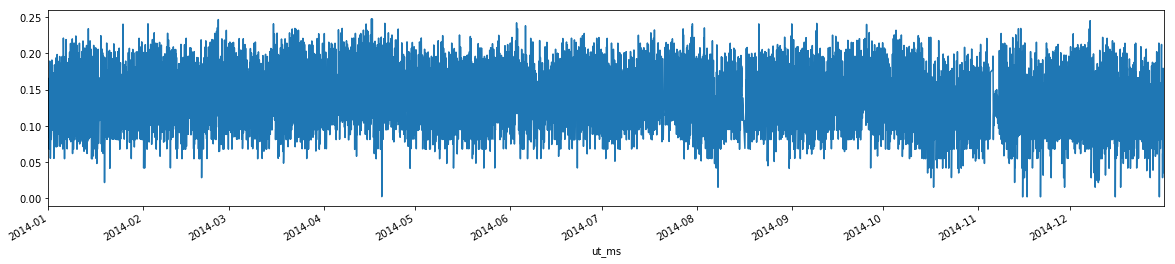

In [33]:
train_data.NPWD2372.plot(figsize=(20, 4))

In [34]:
train_dates = train_data.index < '2014-08-01 00:00:00'

In [35]:
train_df = train_data[train_dates]
valid_df = train_data[~train_dates]

train_df.shape, valid_df.shape

((5088, 56), (3635, 56))

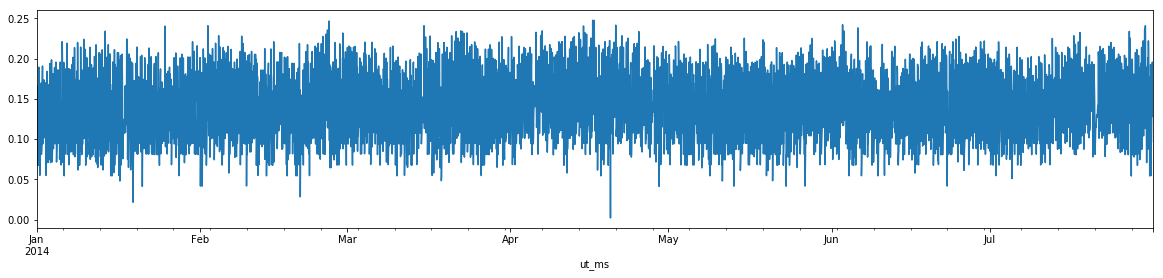

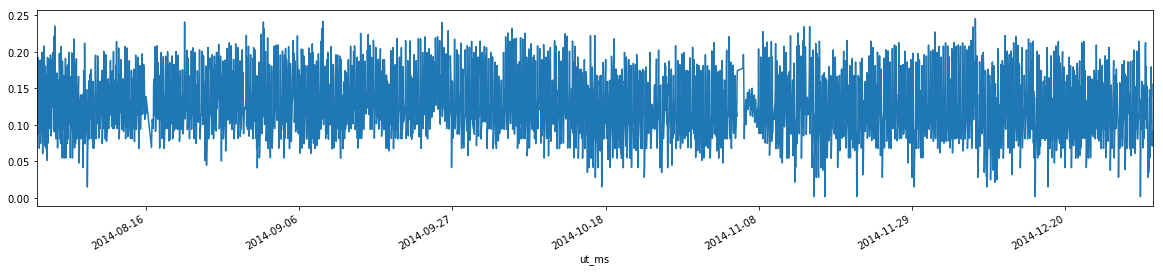

In [36]:
train_df.NPWD2372.plot(figsize=(20, 4))
plt.show()
valid_df.NPWD2372.plot(figsize=(20, 4))

In [37]:
x_columns = filter(lambda x: "NPWD" not in x 
                   and 'ut_ms' not in x, train_df.columns)
x_columns

['sunmars_km',
 'earthmars_km',
 'sunmarsearthangle_deg',
 'solarconstantmars',
 'eclipseduration_min',
 'occultationduration_min',
 'sa',
 'sx',
 'sy',
 'sz',
 'dmop_count_24h_AAAA',
 'dmop_count_24h_AACF',
 'dmop_count_24h_AHHH',
 'dmop_count_24h_AMMM',
 'dmop_count_24h_AOOO',
 'dmop_count_24h_APSF',
 'dmop_count_24h_ASSS',
 'dmop_count_24h_ASXX',
 'dmop_count_24h_ATMB',
 'dmop_count_24h_ATTT',
 'dmop_count_24h_AVVV',
 'dmop_count_24h_AXXX',
 'dmop_count_24h_sum']

In [38]:
y_columns = filter(lambda x: "NPWD"  in x, train_df.columns)
y_columns

['NPWD2372',
 'NPWD2401',
 'NPWD2402',
 'NPWD2451',
 'NPWD2471',
 'NPWD2472',
 'NPWD2481',
 'NPWD2482',
 'NPWD2491',
 'NPWD2501',
 'NPWD2531',
 'NPWD2532',
 'NPWD2551',
 'NPWD2552',
 'NPWD2561',
 'NPWD2562',
 'NPWD2691',
 'NPWD2692',
 'NPWD2721',
 'NPWD2722',
 'NPWD2742',
 'NPWD2771',
 'NPWD2791',
 'NPWD2792',
 'NPWD2801',
 'NPWD2802',
 'NPWD2821',
 'NPWD2851',
 'NPWD2852',
 'NPWD2871',
 'NPWD2872',
 'NPWD2881',
 'NPWD2882']

In [39]:
# create train/valid datasets
X_train = train_df[x_columns]
y_train = train_df[y_columns]

X_valid = valid_df[x_columns]
y_valid = valid_df[y_columns]

X_test = test_data[x_columns]

# Testing simple models

## Mean power model - the baseline

In [40]:
from sklearn.base import BaseEstimator

In [41]:
all_models = {}

In [42]:
class BaseModel(BaseEstimator):
    def __init__(self, method='mean'):
        self.method = method    
        self.eval_info = {}
        
    def fit(self, X_data, y_data):
        self.y_pred = y_train.agg([self.method], axis=0).values
    
    def predict(self, X_test):
        y_pred = np.zeros(shape=[X_test.shape[0], self.y_pred.shape[1]]) + self.y_pred
        return y_pred
    
    def evaluate_rmse(self, train_dataset, valid_dataset, info="", verbose=True):        
        y_train_pred = self.predict(train_dataset[0])
        y_valid_pred = self.predict(valid_dataset[0])
        
        train_rmse = RMSE(train_dataset[1], y_train_pred)
        valid_rmse = RMSE(valid_dataset[1], y_valid_pred)
                
        self.eval_info['info'] = info
        self.eval_info['name'] = self.__class__.__name__
        self.eval_info['train_rmse'] = train_rmse
        self.eval_info['valid_rmse'] = valid_rmse
        self.eval_info['valid_rmse_per_line'] = RMSE(valid_dataset[1], y_valid_pred, axis=0)
        
        if verbose:
            print(self.__class__.__name__ + ": " + info)
            print("RMSE train = ", train_rmse)
            print("RMSE valid = ", valid_rmse)
    

mean_model = BaseModel(method='mean')
mean_model.fit(X_train, y_train)

median_model = BaseModel(method='median')
median_model.fit(X_train, y_train)

In [43]:
mean_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="mean model")

all_models['mean_model'] = mean_model

median_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="median model")

all_models['median_model'] = median_model

BaseModel: mean model
RMSE train =  0.116116107057
RMSE valid =  0.156598699226
BaseModel: median model
RMSE train =  0.117767215632
RMSE valid =  0.164570752021


In [44]:
from hackathon.utils.model_utils import benchmark_models, benchmark_model

benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2721,NPWD2791,NPWD2802,NPWD2851,info,train_rmse,valid_rmse
BaseModel,0.471686,0.513775,0.550805,0.091657,0.094463,NaN,0.249436,median model,0.117767,0.164571
BaseModel,0.456147,0.453363,0.530862,0.092579,NaN,0.081993,0.268440,mean model,0.116116,0.156599


## Create a submission file

In [45]:
def create_submission_df(model, X_test_features, y_columns): 
    y_test_pred = model.predict(X_test_features)
    submision_df = pd.DataFrame(data=y_test_pred, index=X_test.index, columns=y_columns)
    submision_df.index = to_utms(submision_df.index)
    return submision_df


sub_df = create_submission_df(mean_model, X_test[x_columns], y_columns)
sub_df.to_csv("../submissions/small_dataset_mean_model.csv")

In [46]:
sub_df[:20]

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1420070400000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420074000000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420077600000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420081200000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420084800000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420088400000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420092000000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420095600000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369
1420099200000,0.133964,0.001525,0.175324,0.842116,0.000738,0.001631,0.001546,0.001895,0.203326,0.005208,...,0.001272,0.001538,0.125782,0.005782,0.431293,0.000529,0.000521,0.000744,0.044938,0.003369


## Building simple Neural Network

In [47]:
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.metrics import *
import keras.backend as K

In [48]:
num_features = X_train.shape[1]
num_power_lines = y_train.shape[1]
print("num_features    = ", num_features)
print("num_power_lines = ", num_power_lines)

num_features    =  23
num_power_lines =  33


In [49]:
# Custom loss, to be used by Keras
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [50]:
class SimpleNeuralNetwork(BaseModel):
    def __init__(self, input_shape, output_shape=33, layers=[]):        
        BaseModel.__init__(self)
        
        self.layers = layers
        self.model = None
        self.input_shape = input_shape
        self.output_shape = output_shape
        
        input_data = Input(shape=[input_shape])
        x = input_data
        for l in self.layers:
            x = Dense(l, activation='relu')(x)
            x = Dropout(rate=0.3)(x)
            
        x = Dense(output_shape, activation='linear')(x)
        self.model = Model(input_data, x)
        self.loss = root_mean_squared_error
          
    def fit(self, x, y, batch_size=64, lr_scheme=[0.01, 0.001], epochs_scheme=[1, 1]):
        # run over differnt lr and epochs
        for lr, epochs in zip(lr_scheme, epochs_scheme):
            print("Running {} epochs with learning rate {}".format(epochs, lr))
            self.model.compile(optimizer=Adam(lr=lr), loss=self.loss)
            self.model.fit(x=x, y=y, batch_size=batch_size, epochs=epochs)
    
    def predict(self, x):
        batch_size=64
        return self.model.predict(x, batch_size=batch_size)

            
nn_model = SimpleNeuralNetwork(input_shape=num_features, output_shape=num_power_lines, layers=[128, 64])
nn_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3072      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                2145      
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
_________________________________________________________________


In [51]:
X_norm_train = normalize_features(X_train, method='uniform_symmetric')
X_norm_valid = normalize_features(X_valid, method='uniform_symmetric')

In [52]:
nn_model.fit(x=X_norm_train, y=y_train.values, epochs_scheme=[2, 2, 1], lr_scheme=[0.01, 0.001, 0.0001])
all_models['nn_model'] = nn_model

Running 2 epochs with learning rate 0.01
Epoch 1/2
5088/5088 [==============================] - 8s - loss: 0.1365     
Epoch 2/2
5088/5088 [==============================] - 0s - loss: 0.1056     
Running 2 epochs with learning rate 0.001
Epoch 1/2
5088/5088 [==============================] - 0s - loss: 0.1021     
Epoch 2/2
5088/5088 [==============================] - 0s - loss: 0.1014     
Running 1 epochs with learning rate 0.0001
Epoch 1/1
5088/5088 [==============================] - 0s - loss: 0.1008     


In [53]:
nn_model.evaluate_rmse(train_dataset=(X_norm_train, y_train.values), 
                         valid_dataset=(X_norm_valid, y_valid.values), 
                         info="simple neural network")

SimpleNeuralNetwork: simple neural network
RMSE train =  0.101765261782
RMSE valid =  0.113661926945


In [54]:
all_models['nn_model'] = nn_model

In [55]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2721,NPWD2791,NPWD2802,NPWD2851,info,train_rmse,valid_rmse
SimpleNeuralNetwork,0.281891,0.330141,0.405469,0.076856,0.079999,NaN,0.196388,simple neural network,0.101765,0.113662
BaseModel,0.471686,0.513775,0.550805,0.091657,0.094463,NaN,0.249436,median model,0.117767,0.164571
BaseModel,0.456147,0.453363,0.530862,0.092579,NaN,0.081993,0.268440,mean model,0.116116,0.156599


## Simple Neural classifier

In [56]:
from keras.utils import to_categorical

# convert power line to quantized values 
def labels_power_lines(y_data, num_classes=10):
    y = normalize_features(y_data, method='uniform')
    y_max = y_data.max(0)
    y_min = y_data.min(0)
    class_indices = np.round(y * (num_classes - 1)).astype(np.int32)

    labels = []
    for c in class_indices:    
        l = to_categorical(c, num_classes=num_classes) 
        labels.append(l)    

    labels = np.array(labels)
    return labels, y_min, y_max

# restore power line from quantized values
def labels_to_power(y_labels, y_min, y_max):
    num_classes = float(y_labels.shape[2])
    normalized_power = np.argmax(y_labels, 2)/num_classes    
    power = normalized_power*(y_max - y_min) + y_min
    return power

In [46]:
# Check reconstruction error
num_classes = 5
y_lbs_train, y_min, y_max = labels_power_lines(y_train.values, num_classes=num_classes)
y_reconstructed = labels_to_power(y_lbs_train, y_min, y_max)
print("Reconstruction RMSE:", RMSE(y_reconstructed, y_train))

Reconstruction RMSE: 0.0645002500351


In [47]:
class SimpleClassifier(SimpleNeuralNetwork):
    def __init__(self, y_min, y_max, input_shape, output_shape=33, num_classes=10, layers=[]):
        BaseModel.__init__(self)
        
        self.layers = layers
        self.model = None
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.num_classes = num_classes
        self.y_min = y_min
        self.y_max = y_max
        
        # Model definition
        input_data = Input(shape=[input_shape])
        x = input_data
        for l in self.layers:
            x = Dense(l, activation='relu')(x)
            x = BatchNormalization()(x)
            x = Dropout(rate=0.3)(x)
            
        x = Dense(output_shape * num_classes, activation='linear')(x)
        x = Reshape(target_shape=[output_shape, num_classes])(x)
        x = Lambda(lambda x: tf.nn.softmax(x, dim=-1))(x)
        self.model = Model(input_data, x)
        self.loss = "categorical_crossentropy"
        
    def predict(self, x):
        batch_size=64        
        y_pred = self.model.predict(x, batch_size=batch_size)
        y_pred = labels_to_power(y_pred, self.y_min, self.y_max)
        return y_pred
        
          
cls_model = SimpleClassifier( 
    y_min, y_max,
    input_shape=num_features, 
    output_shape=num_power_lines, 
    num_classes=num_classes, 
    layers=[128, 64])

cls_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

In [48]:
cls_model.fit(x=X_norm_train, y=y_lbs_train, epochs_scheme=[2, 2, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4956     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4450     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4346     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4317     
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37928/37928 [==============================] - 3s - loss: 0.4310     
Epoch 2/2
37928/37928 [==============================] - 2s - loss: 0.4303     


In [49]:
cls_model.evaluate_rmse(train_dataset=(X_norm_train, y_train.values), 
                         valid_dataset=(X_norm_valid, y_valid.values), 
                         info="simple neural classifier with {} classes".format(num_classes))

SimpleClassifier: simple neural classifier with 5 classes
RMSE train =  0.110228300858
RMSE valid =  0.134486967623


In [50]:
all_models['cls_model'] = cls_model

In [51]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
SimpleNeuralNetwork,0.302990,0.203582,0.440411,0.112907,0.197992,0.117038,0.089481,0.113445,simple neural network
SimpleClassifier,0.358288,0.243637,0.516721,0.115662,0.255398,0.119799,0.110228,0.134487,simple neural classifier with 5 classes
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model


### The motivation 

:( motivation was, quantization of certain power lines...

(array([ 35333.,    387.,    445.,    298.,   1465.]),
 array([ 0.00613403,  0.14958711,  0.29304019,  0.43649328,  0.57994636,
         0.72339944]),
 <a list of 5 Patch objects>)

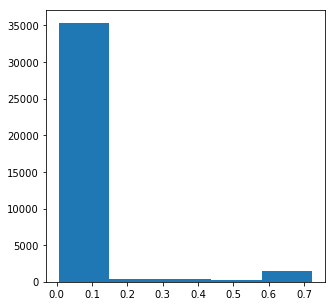

In [52]:
plt.hist(y_train['NPWD2881'], num_classes)

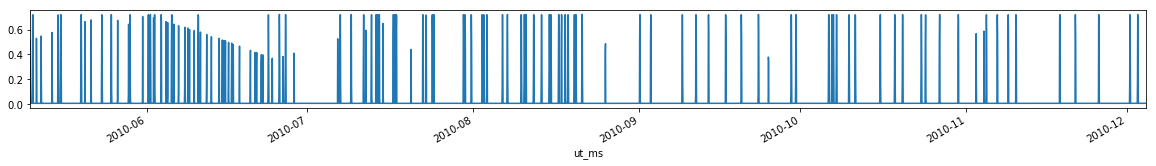

In [53]:
plt.figure(figsize=(20, 2))
y_train['NPWD2881'][15000:20000].plot()

In [54]:
y_pred_cls = cls_model.predict(X_norm_valid)
y_pred_reg = nn_model.predict(X_norm_valid)
y_pred_mean = mean_model.predict(X_norm_valid)

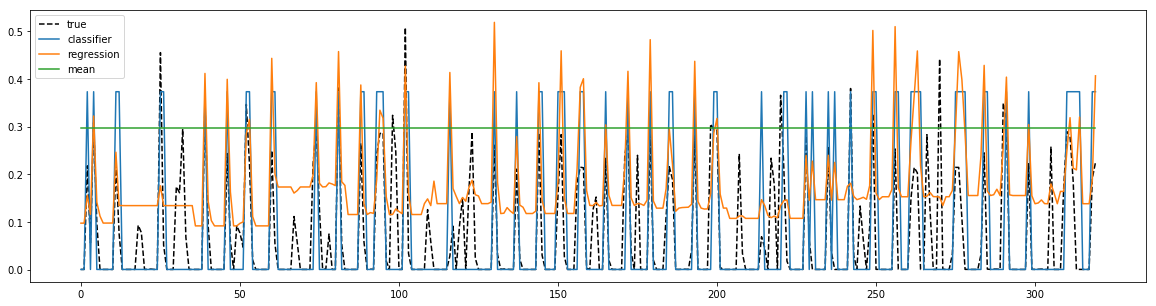

In [62]:
idx = np.where(y_valid.columns == 'NPWD2551')[0][0]

a, b = 480, 800

plt.figure(figsize=(20, 5))
plt.plot(y_valid.values[a:b, idx],'k--', label='true')
plt.plot(y_pred_cls[a:b, idx], label='classifier')
plt.plot(y_pred_reg[a:b, idx], label='regression')
plt.plot(y_pred_mean[a:b, idx], label='mean')
plt.legend()

Probably features are too simple for that line

## Time window simple model

In [63]:
def gen_windowed_dataset(X_data, y_data, window=5):
    it = 0
    data = []
    y = []
    while True:         
        if it + window >= X_data.shape[0]:
            break

        a = it
        b = it + window
        data.append(X_data[a:b])
        y.append(y_data[b])
        it += 1
        
    return np.array(data), np.array(y)
        
window_size = 10
X_win_train, y_win_train = gen_windowed_dataset(X_norm_train, y_train.values, window=window_size)
X_win_valid, y_win_valid = gen_windowed_dataset(X_norm_valid, y_valid.values, window=window_size)

print(X_win_train.shape, y_win_train.shape)

X_win_train = X_win_train.reshape([X_win_train.shape[0], -1])
X_win_valid = X_win_valid.reshape([X_win_valid.shape[0], -1])

print(X_win_train.shape, y_win_train.shape)

(37918, 10, 26) (37918, 33)
(37918, 260) (37918, 33)


In [64]:
num_win_features = X_win_train.shape[1] # num_features * window_size
nn_win_model = SimpleNeuralNetwork(input_shape=num_win_features, output_shape=num_power_lines, layers=[100, 50])
nn_win_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 260)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               26100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 33)                1683      
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


In [65]:
nn_win_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 2, 1], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.1056     
Epoch 2/2
37918/37918 [==============================] - 1s - loss: 0.0957     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37918/37918 [==============================] - 1s - loss: 0.0943     
Epoch 2/2
37918/37918 [==============================] - 1s - loss: 0.0943     
Running 1 epochs with learning rate 0.0001
Epoch 1/1
37918/37918 [==============================] - 1s - loss: 0.0942     


In [66]:
nn_win_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="windowed neural network")

all_models['nn_win_model'] = nn_win_model

SimpleNeuralNetwork: windowed neural network
RMSE train =  0.099913983618
RMSE valid =  0.111463812533


### More powerfull model = MORE LAYERS!!!!

In [67]:
better_nn_win_model = SimpleNeuralNetwork(input_shape=num_win_features, output_shape=num_power_lines, layers=[256, 128, 64])
better_nn_win_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 260)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               66816     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
__________

In [68]:
better_nn_win_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 2, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.1034     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.0936     
Running 2 epochs with learning rate 0.001
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.0901     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.0891     
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37918/37918 [==============================] - 2s - loss: 0.0884     
Epoch 2/2
37918/37918 [==============================] - 2s - loss: 0.0884     


In [69]:
better_nn_win_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="windowed neural network with [256, 128, 64] layers")

all_models['better_nn_win_model'] = better_nn_win_model

SimpleNeuralNetwork: windowed neural network with [256, 128, 64] layers
RMSE train =  0.0931937143738
RMSE valid =  0.114952189048


In [70]:
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,train_rmse,valid_rmse,info
SimpleNeuralNetwork,0.285093,0.215959,0.466795,0.112522,0.184622,0.116771,0.093194,0.114952,"windowed neural network with [256, 128, 64] la..."
SimpleNeuralNetwork,0.265663,0.243122,0.435828,0.112072,0.182350,0.116904,0.099914,0.111464,windowed neural network
BaseModel,0.401223,0.268071,0.628200,0.121259,0.203353,0.119656,0.123222,0.149133,median model
SimpleNeuralNetwork,0.302990,0.203582,0.440411,0.112907,0.197992,0.117038,0.089481,0.113445,simple neural network
BaseModel,0.359447,0.251891,0.500584,0.113754,0.215772,0.117018,0.112497,0.129157,mean model
SimpleClassifier,0.358288,0.243637,0.516721,0.115662,0.255398,0.119799,0.110228,0.134487,simple neural classifier with 5 classes


## Simple RNN

In [71]:
window_size = 32
X_win_train, y_win_train = gen_windowed_dataset(X_norm_train, y_train.values, window=window_size)
X_win_valid, y_win_valid = gen_windowed_dataset(X_norm_valid, y_valid.values, window=window_size)

X_win_train = np.transpose(X_win_train, [0, 2, 1])
X_win_valid = np.transpose(X_win_valid, [0, 2, 1])

input_shape = X_win_train.shape[1:]

print(input_shape, X_win_train.shape, y_win_train.shape)

(26, 32) (37896, 26, 32) (37896, 33)


In [72]:
class SimpleLSTM(SimpleNeuralNetwork):
    def __init__(self, input_shape, output_shape=33):
        BaseModel.__init__(self)
        
        self.input_shape = input_shape
        self.output_shape = output_shape

        # Model definition
        input_data = Input(shape=input_shape)
        x = input_data
        x = LSTM(256)(x)
        x = Dropout(0.4)(x) 
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.4)(x) 
        x = Dense(output_shape, activation='linear')(x)

        self.model = Model(input_data, x)
        self.loss = root_mean_squared_error

rnn_model = SimpleLSTM(input_shape=input_shape, output_shape=num_power_lines)
rnn_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 26, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               295936    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 33)                4257      
Total params: 333,089
Trainable params: 333,089
Non-trainable params: 0
_________________________________________________________________


In [73]:
rnn_model.fit(x=X_win_train, y=y_win_train, epochs_scheme=[2, 3, 2], lr_scheme=[0.01, 0.001, 0.0001])

Running 2 epochs with learning rate 0.01
Epoch 1/2
37896/37896 [==============================] - 26s - loss: 0.1087    
Epoch 2/2
37896/37896 [==============================] - 25s - loss: 0.0928    
Running 3 epochs with learning rate 0.001
Epoch 1/3
37896/37896 [==============================] - 26s - loss: 0.0846    
Epoch 2/3
37896/37896 [==============================] - 25s - loss: 0.0818    
Epoch 3/3
37896/37896 [==============================] - 26s - loss: 0.0798    
Running 2 epochs with learning rate 0.0001
Epoch 1/2
37896/37896 [==============================] - 26s - loss: 0.0778    
Epoch 2/2
37896/37896 [==============================] - 25s - loss: 0.0776    


In [74]:
rnn_model.evaluate_rmse(train_dataset=(X_win_train, y_win_train), 
                         valid_dataset=(X_win_valid, y_win_valid), 
                         info="simple LSTM 256")

SimpleLSTM: simple LSTM 256
RMSE train =  0.0809012422398
RMSE valid =  0.144072325602


In [75]:
all_models['lstm'] = rnn_model

In [76]:
pd.set_option('display.max_colwidth', -1)
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2531,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,info,train_rmse,valid_rmse
SimpleNeuralNetwork,0.285093,NaN,0.215959,0.466795,0.112522,0.184622,0.116771,"windowed neural network with [256, 128, 64] layers",0.093194,0.114952
SimpleNeuralNetwork,0.265663,NaN,0.243122,0.435828,0.112072,0.182350,0.116904,windowed neural network,0.099914,0.111464
BaseModel,0.401223,NaN,0.268071,0.628200,0.121259,0.203353,0.119656,median model,0.123222,0.149133
SimpleNeuralNetwork,0.302990,NaN,0.203582,0.440411,0.112907,0.197992,0.117038,simple neural network,0.089481,0.113445
BaseModel,0.359447,NaN,0.251891,0.500584,0.113754,0.215772,0.117018,mean model,0.112497,0.129157
SimpleLSTM,0.390342,0.158623,0.278808,0.559410,0.135466,0.206231,NaN,simple LSTM 256,0.080901,0.144072
SimpleClassifier,0.358288,NaN,0.243637,0.516721,0.115662,0.255398,0.119799,simple neural classifier with 5 classes,0.110228,0.134487


## XGBOOST !

In [77]:
from tqdm import trange, tqdm
import xgboost as xgb

params = {
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bylevel': 0.4,
    'colsample_bytree': 0.4,
    'n_estimators': 120
}

class XGBPerTarget(BaseModel):
    def __init__(self):
        BaseModel.__init__(self)
        self.estimators = []
    
    def _fit_per_estimator(self, X_data, y_data, n_of_targets):
        for idx in trange(n_of_targets):
            self.estimators[idx].fit(X_data, y_data[:, idx])
        
    def fit(self, X_data, y_data):
        n_of_targets = y_data.shape[1]
        self.estimators = [xgb.XGBRegressor(**params) for _ in range(n_of_targets)]
        self._fit_per_estimator(X_data, y_data, n_of_targets)
        
    def predict(self, X_data):
        return np.hstack([est.predict(X_data).reshape(-1, 1) for est in tqdm(self.estimators)])
    
    
    
xgb_model = XGBPerTarget()

In [78]:
xgb_model.fit(X_train.values, y_train.values)

100%|██████████| 33/33 [00:13<00:00,  2.77it/s]


In [79]:
xgb_model.evaluate_rmse(train_dataset=(X_train.values, y_train.values), 
                         valid_dataset=(X_valid.values, y_valid.values), 
                         info="XGBOOST!!!")

100%|██████████| 33/33 [00:00<00:00, 115.85it/s]

XGBPerTarget: XGBOOST!!!
RMSE train =  0.0811527576809
RMSE valid =  0.115688056815


In [80]:
all_models['xgb_model'] = xgb_model

In [81]:
pd.set_option('display.max_colwidth', -1)
benchmark_models(all_models, y_columns)

,NPWD2451,NPWD2531,NPWD2532,NPWD2551,NPWD2561,NPWD2851,NPWD2881,info,train_rmse,valid_rmse
SimpleNeuralNetwork,0.285093,NaN,0.215959,0.466795,0.112522,0.184622,0.116771,"windowed neural network with [256, 128, 64] layers",0.093194,0.114952
SimpleNeuralNetwork,0.265663,NaN,0.243122,0.435828,0.112072,0.182350,0.116904,windowed neural network,0.099914,0.111464
BaseModel,0.401223,NaN,0.268071,0.628200,0.121259,0.203353,0.119656,median model,0.123222,0.149133
SimpleNeuralNetwork,0.302990,NaN,0.203582,0.440411,0.112907,0.197992,0.117038,simple neural network,0.089481,0.113445
BaseModel,0.359447,NaN,0.251891,0.500584,0.113754,0.215772,0.117018,mean model,0.112497,0.129157
XGBPerTarget,0.297057,0.182043,0.185035,0.431154,NaN,0.224187,0.116799,XGBOOST!!!,0.081153,0.115688
SimpleLSTM,0.390342,0.158623,0.278808,0.559410,0.135466,0.206231,NaN,simple LSTM 256,0.080901,0.144072
SimpleClassifier,0.358288,NaN,0.243637,0.516721,0.115662,0.255398,0.119799,simple neural classifier with 5 classes,0.110228,0.134487
